<center> 
    <img src="./logo_UTN.svg" height=”250” width=200”>
</center>

<h1><center> TAREA SEMANAL 5 <center></h1>
    <h2><center> TEORIA DE LOS CIRCUITOS 2<center></h2>
    <h3>Destefano, Martin</h3>

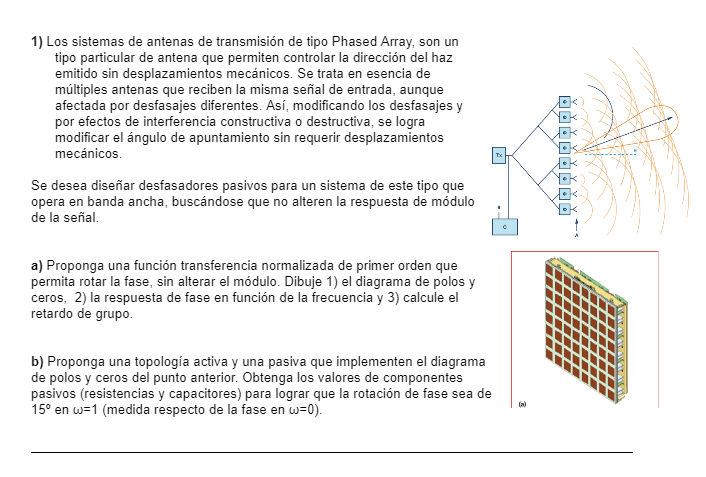

Como vimos en la TS1, el rotador de fase tiene una transferencia: 

$$ T(S) = \frac{S-z_{1}}{S+p_{1}} $$

Como el ejercicio no los pide normalizado: 

$$ T(S) = \frac{S-\omega_{0}}{S+\omega{0}} = \frac{S-1}{S+1} $$

Ubicados en en el mismo radio tendremos un polo en el semiplano izquierdo y un cero en el semiplano derecho: 

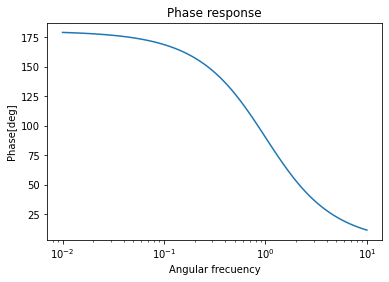

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

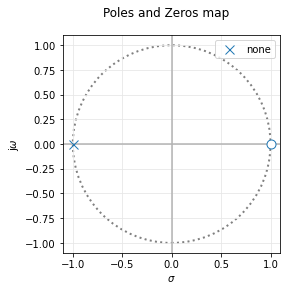

In [5]:
import splane as sp 
import scipy.signal as sig
import matplotlib.pyplot as plt 
Transfer = sig.TransferFunction([1,-1],[1,1])


w, mag, phase = sig.bode(Transfer)
plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()

sp.pzmap(Transfer)


Finalmente calculamos el retardo de grupo siendo: 

La funcion de la fase: 
$$ \varphi = \pi - 2 tan^{-1}(\omega) $$

$$ -\frac{\partial\varphi}{\partial\omega} = \frac{2}{1+\omega^2} $$

Para el punto B proponemos dos topologias

Para la topologia pasiva, optamos por el circuito Lattice 

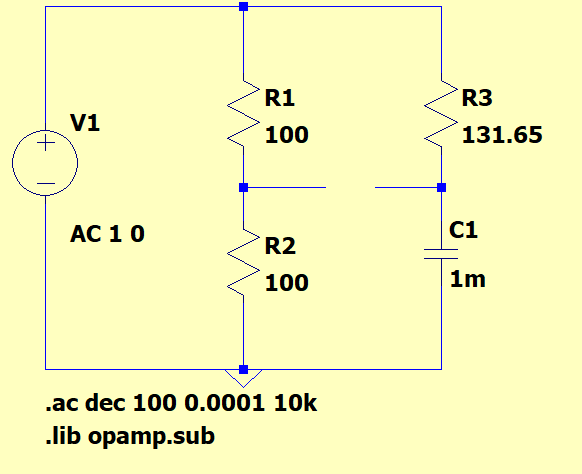

Para la topologia activa, optamos por el siguiente circuito: 

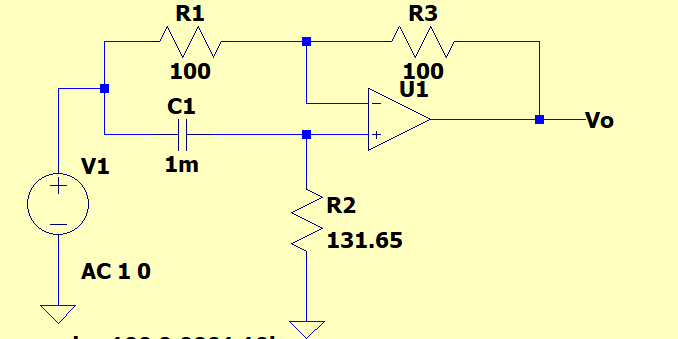

Finalmente para las caracteristicas de fase requeridas: 

Simulaciones: 
Circuito pasivo: 

Lo interesante del pasivo que la tension de salida la medimos de forma diferencial

Podemos observar como la fase se reduce 15° con respecto a $\omega_{0} = 0 $ en $\omega_{0} = 1$ que en el eje de frecuencia convertida es aproximadamente 159mHz

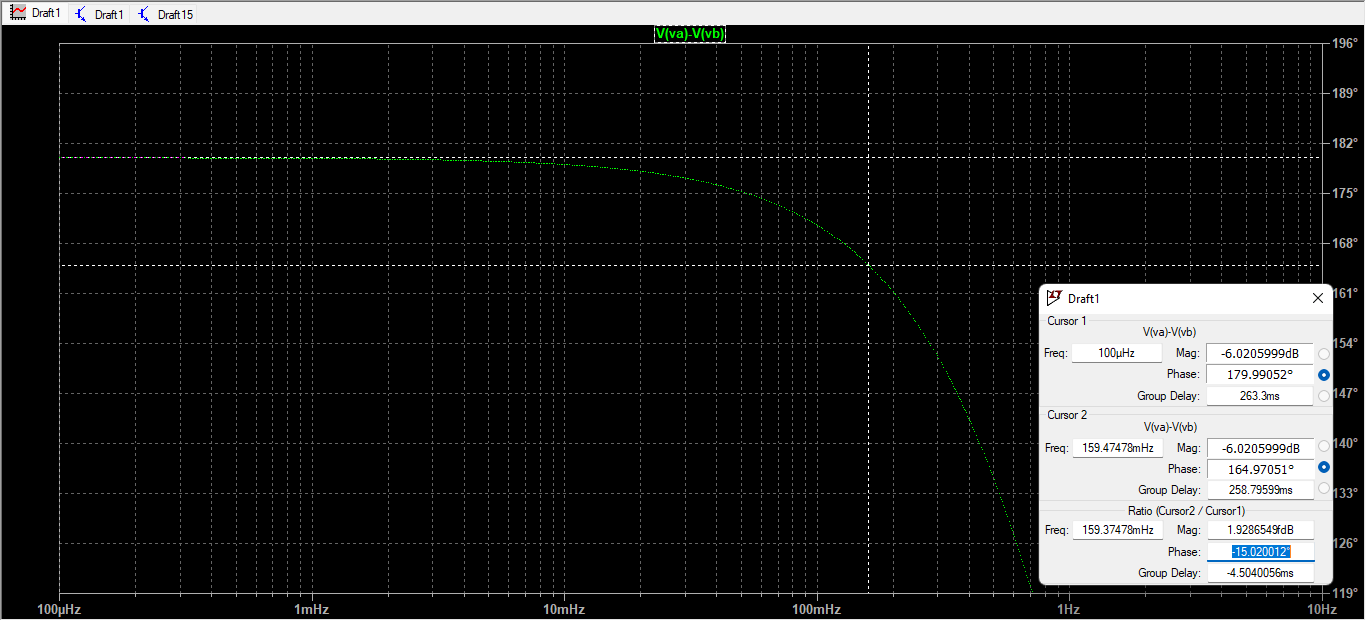

Circuito activo: 

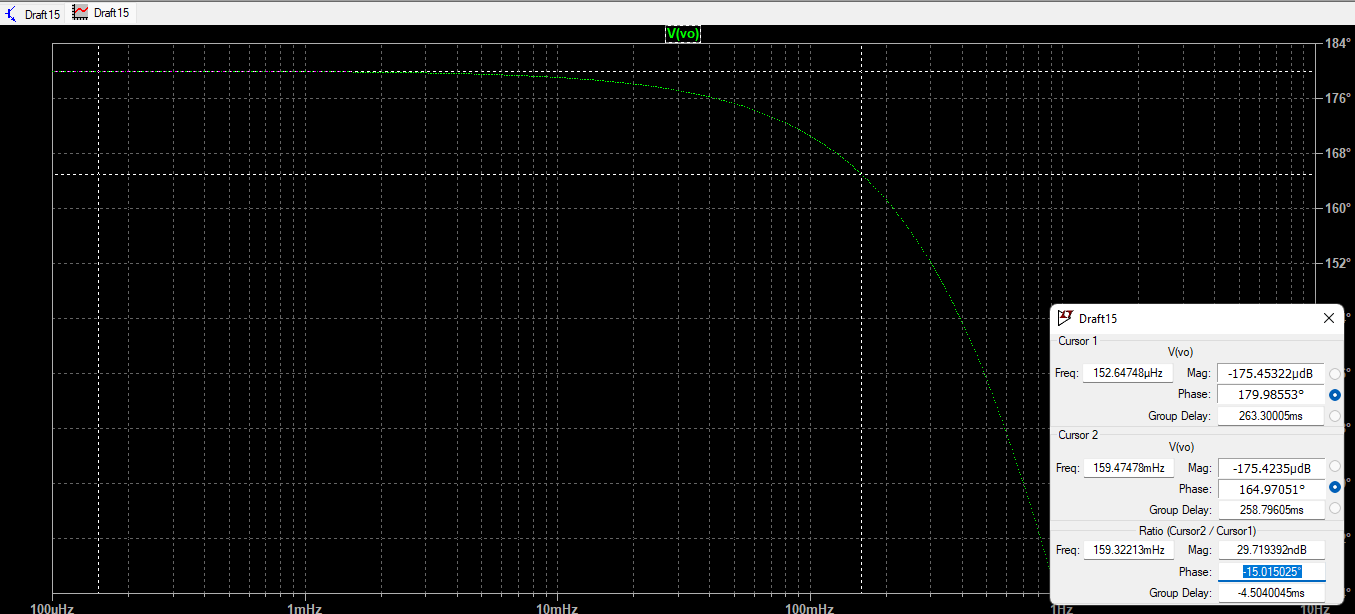

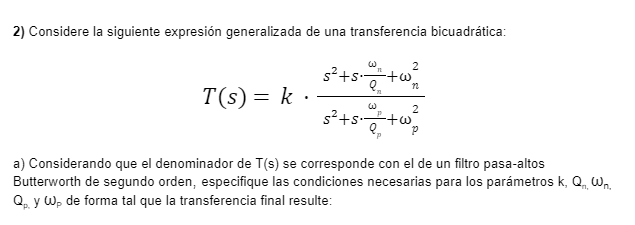
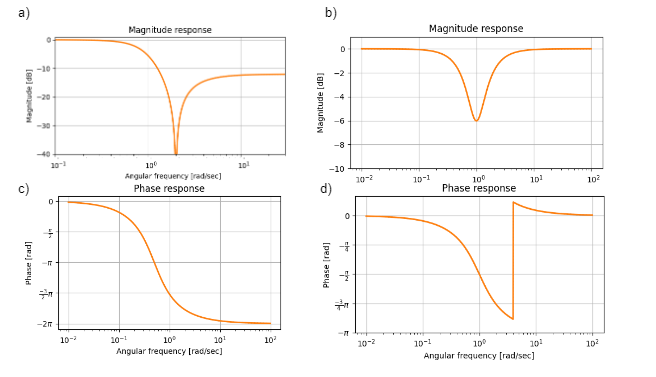

Para las implementaciones circuitales utilizaremos el modelo basico de transferencias bicuadraticas: 

$$ \frac{S^2 + \frac{Sd}{RCa} + \frac{1}{LC}\frac{b}{a}}{S^2+\frac{S}{RC}+\frac{1}{LC}} $$

Punto A) a) Lo identifico como un filtro Notch pasabajos, cuya transferencia se caracteriza como: 

$$ T(S) = \frac{S^2 + \omega_{z}^2}{S^2+S\frac{\omega_{p}}{Q_{p}}+\omega_{p}^2} $$

La caracteristica de este filtro son ceros en el infinito, por lo tanto el grafico de magnitud se vera afectado primero por los polos, que generan una pendiente negativa en $ \omega_{p} $ que se realza cuando se alcanza el cero. Ademas en $\omega = 0$ la ganancia deberia ser 0dB, pero $ \omega_{p} \not= \omega_{z} $. 
Por lo que tendremos que compensar esa ganancia para que sea la transferencia deseada, los valores son los siguientes: 

$$ \omega_{z} = 2 $$ 
$$ \omega_{p} = 1 $$ 
$$ K = 1/4 $$ 
$$ Q_{z} -> \inf $$ 
$$ Q_{p} = \frac{1}{\sqrt{2}} $$ 

Implementacion circuital: 
$$ a = \frac{1}{4} $$ 
$$ b = 1 $$ 
$$ d = 0 $$ 

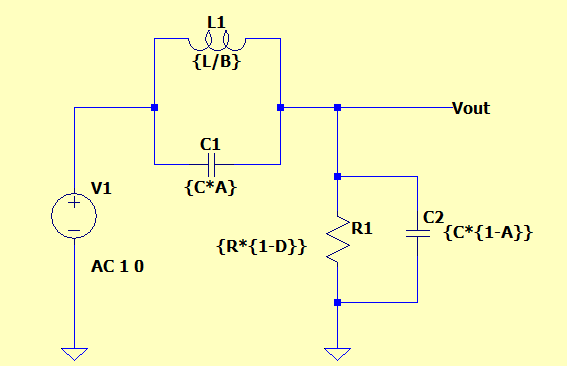

Simulacion circuital: 
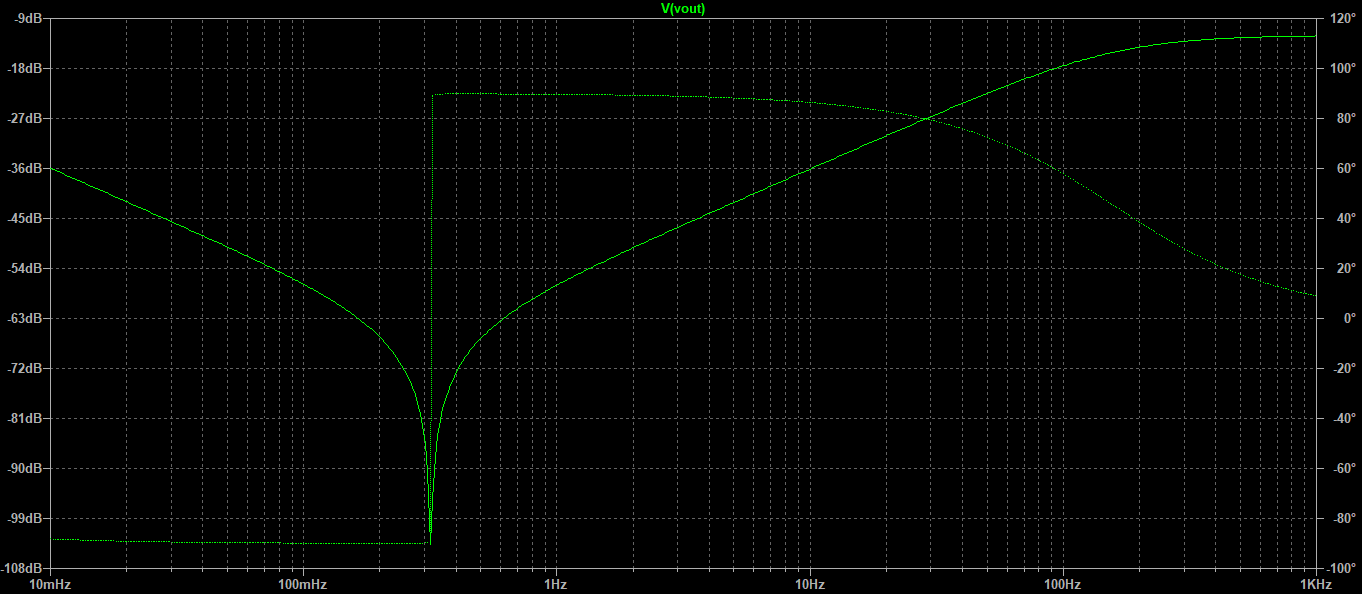
Simulacion: 

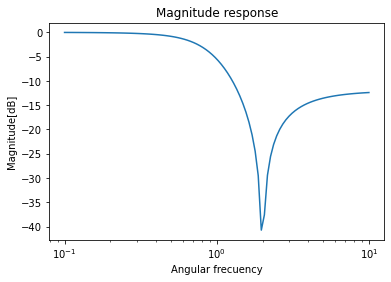

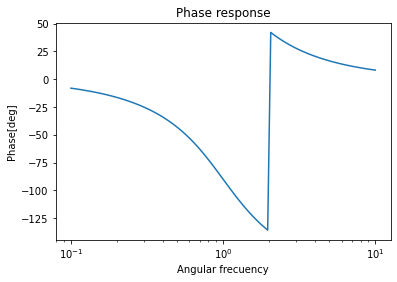

In [20]:
import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp
k = 1/4
myFilter_hand = sig.TransferFunction([k*1,0,k*2**2], [1,m.sqrt(2),1])

w, mag, phase = sig.bode(myFilter_hand)
plt.figure()
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)  # Fase
plt.show()

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()


Punto A) b) Parece ser un filtro Notch pero en realidad es un elimina banda "comun", puede notarse por la selectividad o la atenuacion, que es mucho menor que si fuese un filtro de caracteristicas Notch. 

$$ T(S) = \frac{S^2+S\frac{\omega_{z}}{Q_{z}}+\omega_{z}^2}{S^2+S\frac{\omega_{p}}{Q_{p}}+\omega_{p}^2} $$

En este caso necesito que en $ \omega = 1 $ la transferencia valga 1/2 para tener -6dB en el diagrama de bode, por lo tanto el coeficiente $ \frac{\omega_{z}}{Q_{z}} $ debe ser la mitad que $\frac{\omega_{p}}{Q_{p}}$, en formulas: 

$$ \frac{\sqrt{(\frac{\omega_{z}}{Q_{z}})^2+(1-\omega_{z}^2)^2}}{\sqrt{(\frac{\omega_{p}}{Q_{p}})^2+(1-\omega_{p}^2)^2}} $$
Por lo que los componentes me quedan:  

$$ \omega_{z} = 1 $$ 
$$ \omega_{p} = 1 $$ 
$$ K = 1 $$ 
$$ Q_{z} = \frac{2}{\sqrt{2}}$$ 
$$ Q_{p} = \frac{1}{\sqrt{2}} $$ 

Implementacion circuital: 
$$ a = 1 $$ 
$$ b = 1 $$ 
$$ d = 1/2 $$ 

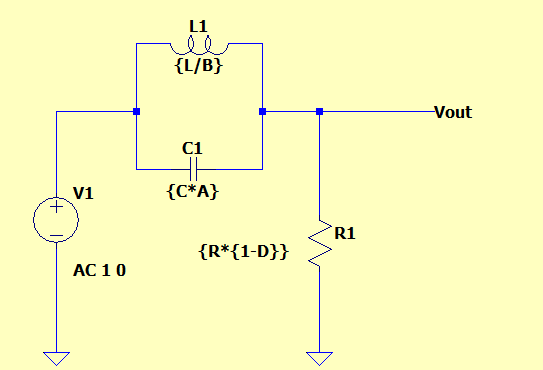

Simulacion circuital: 

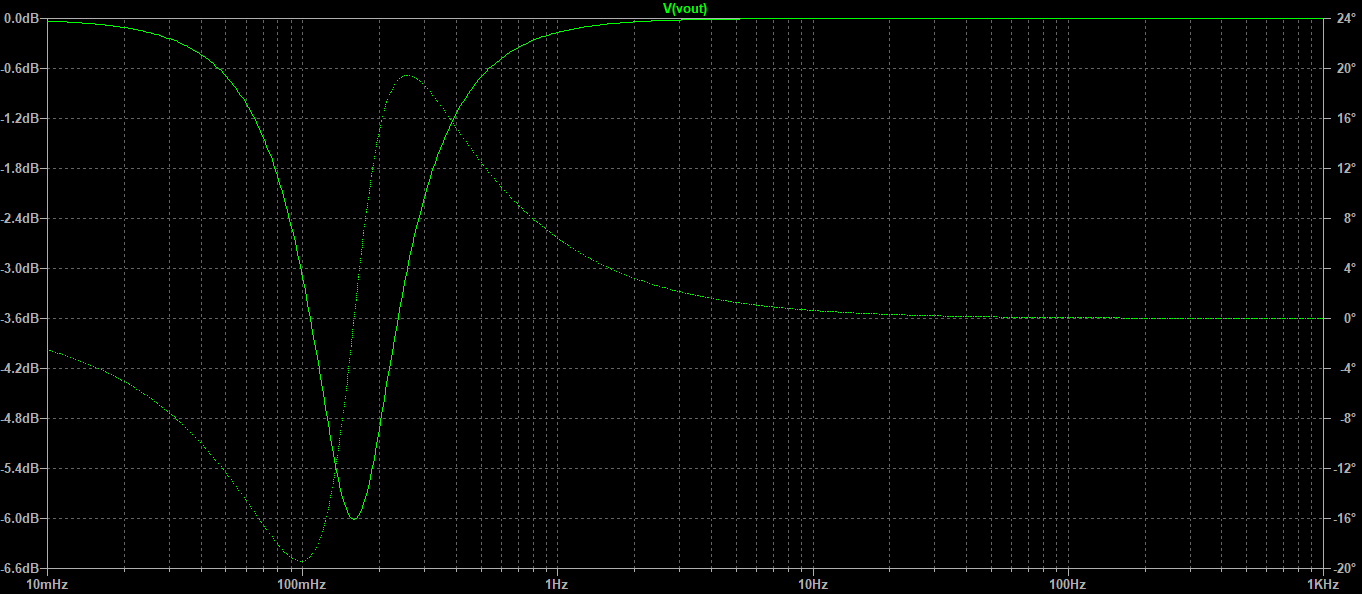


Simulacion: 

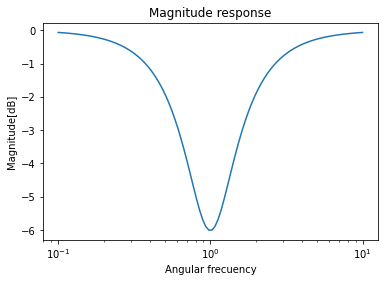

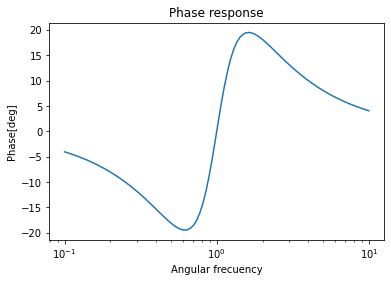

In [21]:

import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp
import matplotlib.pyplot as plt
k = 1/4
myFilter_hand = sig.TransferFunction([1,m.sqrt(2)/2,1], [1,m.sqrt(2),1])

w, mag, phase = sig.bode(myFilter_hand)
plt.figure()
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)  # Fase
plt.show()

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()


Punto A) c) La respuesta de fase de este punto al ser de 0 -> $-2\pi$ nos da a entender que estamos ante un pasatodo de segundo orden, por lo tanto: 
 
$$ T(S) = \frac{S^2-S\frac{\omega_{z}}{Q_{z}}+\omega_{z}^2}{S^2+S\frac{\omega_{p}}{Q_{p}}+\omega_{p}^2} $$

Notamos que la fase para $\omega = 1$ vale $-3/2\pi$, por lo que a traves de la funcion de fase, podemos calcular cuanto vale $\omega_{p} = \omega_{z}$ 

$$ \phi(\omega) = -2 tan^{-1}(\frac{\omega\omega_{p}/Q_{p}}{\omega_{p}^2-\omega^2}) $$

Usando esta funcion, sabemos que $\omega_{p} = 0.5$

$$ \omega_{z} = 0.517 $$ 
$$ \omega_{p} = 0.517 $$ 
$$ K = 1 $$ 
$$ Q_{z} = \frac{1}{\sqrt{2}}$$ 
$$ Q_{p} = \frac{1}{\sqrt{2}} $$ 

Implementacion circuital: 

Con la ayuda del Schaumann y Balbanian llego al circuito del pasatodo: 

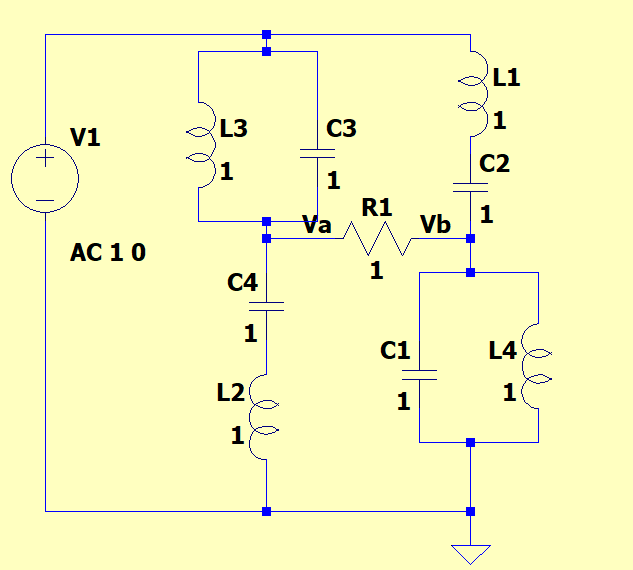


Simulacion: 

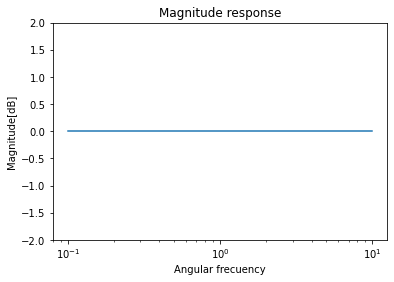

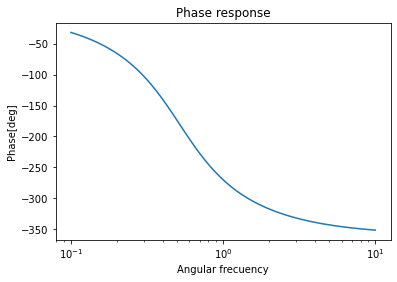

In [3]:
import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp
import matplotlib.pyplot as plt

myFilter_hand = sig.TransferFunction([1,-0.517/(1/m.sqrt(2)),0.517**2], [1,0.517/(1/m.sqrt(2)),0.517**2])

w, mag, phase = sig.bode(myFilter_hand)
plt.figure()
plt.ylim(-2,2)
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)  # Fase
plt.show()

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()

Punto A) d) La respuesta de fase de este rapidamente la vinculamos con la respuesta de un filtro Notch por la forma recta de su transicion. En este caso yo lo analizo a partir de que se produce un realce en la fase, por lo tanto hay un aporte por parte de los ceros, mientras que anteriormente tuvimos un aporte negativos por parte de los polos. El Notch que presenta esta caracteristica es el Notch pasabajos que vimos al principio de la TS. 

Cuya ecuacion era: 

$$ T(S) = \frac{S^2 + \omega_{z}^2}{S^2+S\frac{\omega_{p}}{Q_{p}}+\omega_{p}^2} $$

$$ \omega_{z} = 4 $$ 
$$ \omega_{p} = 1 $$ 
$$ K = 1 $$ 
$$ Q_{z} -> \inf$$ 
$$ Q_{p} = \frac{1}{\sqrt{2}} $$ 

Implementacion circuital: 
$$ a = 1/16 $$ 
$$ b = 1 $$ 
$$ d = 0 $$ 

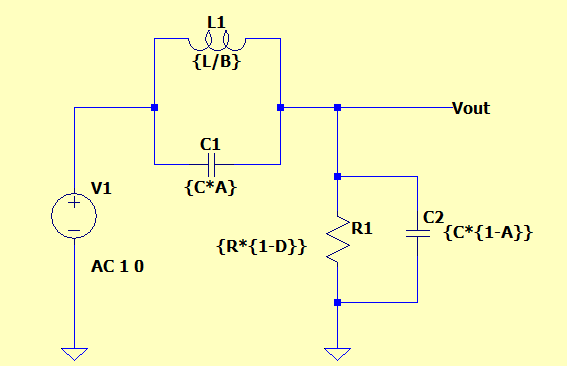

Simulacion circuital: 

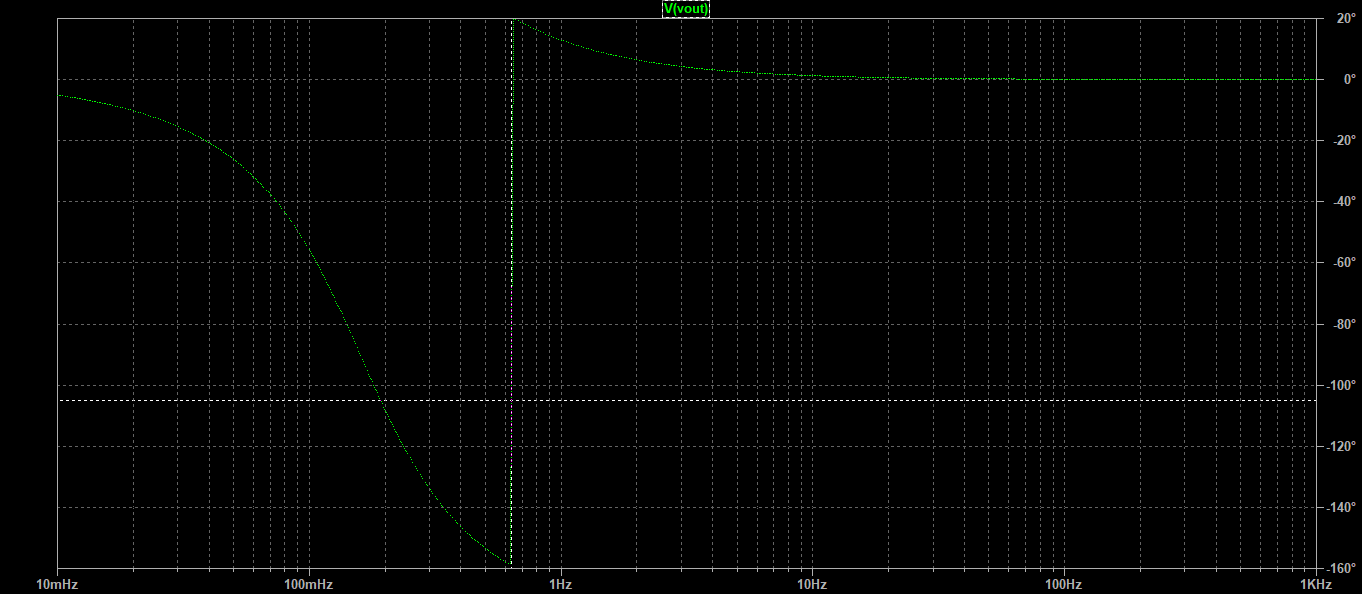

Siguiendo la misma logica, el realce lo tenemos en $ \omega = 4 $ por lo que significa que $\omega_{z} = 4$ y los demas parametros los dejamos como el Butterworth. 

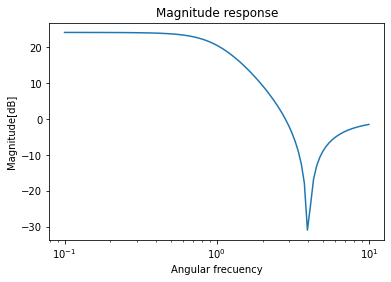

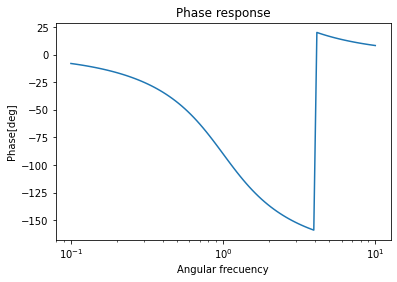

In [10]:
import numpy as np 
import scipy.signal as sig 
import math as m
import splane as sp
myFilter_hand = sig.TransferFunction([1,0,4**2], [1,m.sqrt(2),1])

w, mag, phase = sig.bode(myFilter_hand)
plt.figure()
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)  # Fase
plt.show()

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
plt.show()


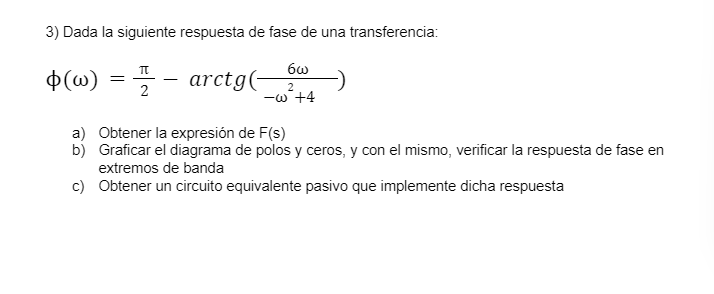

[Explicacion] 

Una vez que sabemos que es un pasabanda, planteamos la transferencia: 

$$ T(S) = \frac{\frac{\omega_{0}}{Q}S}{S^2+\frac{\omega_{0}}{Q}S+\omega_{0}^2} $$

Por un analisis simple sabemos: 

$$ \omega_{0}^2 = 4 $$ 
$$ \frac{\omega_{0}}{Q} = 6 $$ 
$$ Q = 1/3 $$ 

$$ T(S) = \frac{6S}{S^2+6S+4} $$

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

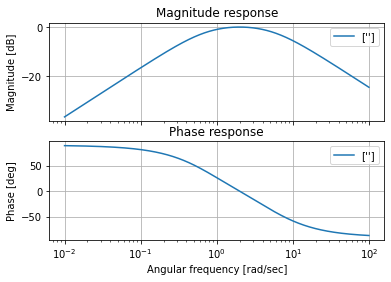

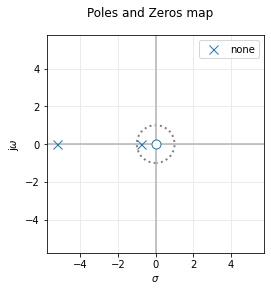

In [11]:
import splane as sp 
import numpy as np 
import math as m

myFilter_hand_desn = sig.TransferFunction([6, 0], [1,6,4])

sp.bodePlot(myFilter_hand_desn )

sp.pzmap(myFilter_hand_desn)


En los graficos anteriores graficamos la funcion fase, el diagrama de polos y ceros a partir de la funcion transferencia calculada. Para comparar adjunto el grafico de la funcion fase en GeoGebra. 

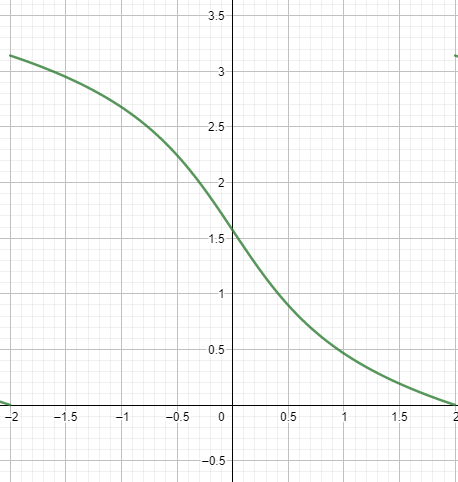 

Por ultimo implementamos el pasabanda. 


Circuito: 
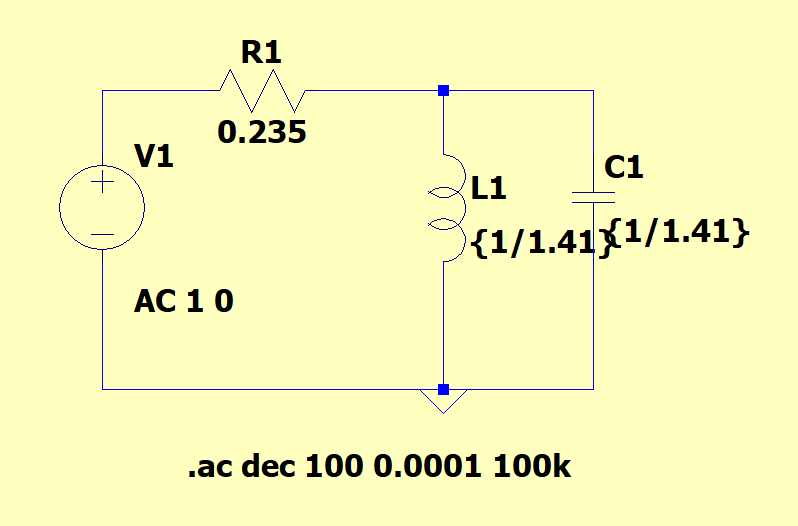
Simulacion:
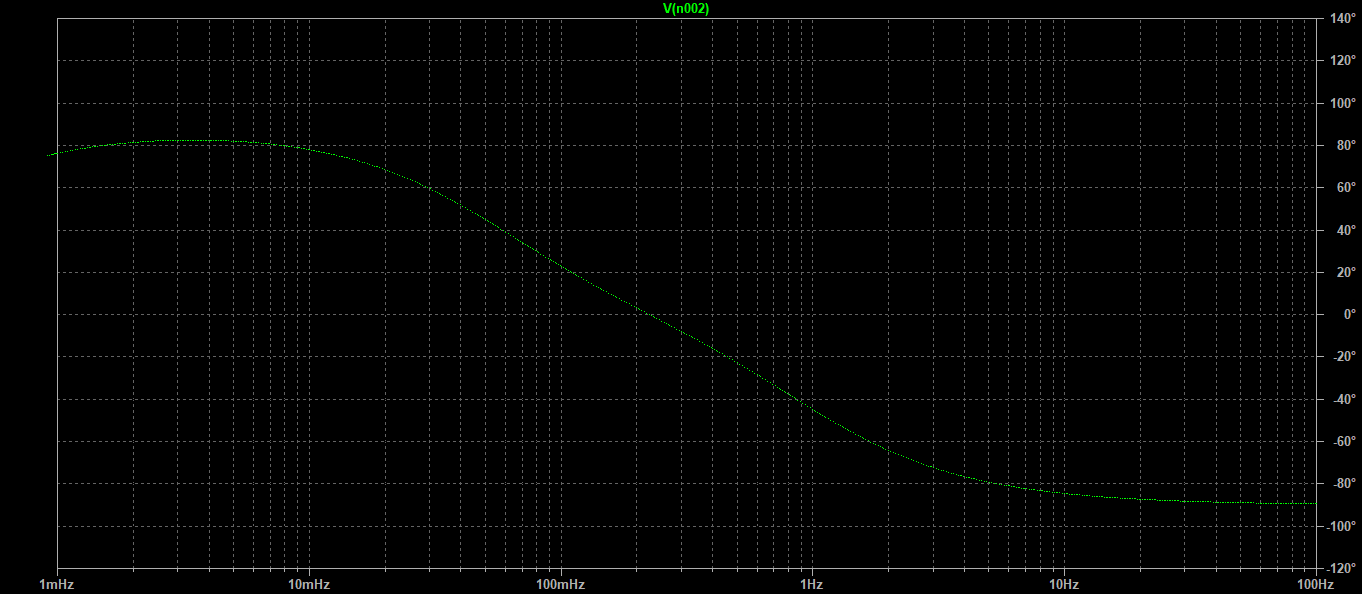